<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/lab7/lineFitLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import scipy as sp
from scipy import optimize
import numpy as np
from matplotlib import pylab as pl

# create synthetic data for line fitting




In [0]:
np.random.seed(555)

Creating the exogenous variable

In [0]:
x_vals = np.random.rand(100) * 10

In [4]:
print(x_vals)

[7.17834087 0.47855133 9.44471978 6.8638004  5.81207334 1.42678616
 9.45919181 3.39990587 6.20435458 4.52959644 2.3976742  0.34504591
 1.48593113 8.10866174 6.53105376 5.44468685 0.41194765 4.68166251
 8.88746733 4.76258557 4.12488984 6.16106538 3.21416554 5.80869263
 3.9661405  0.20091368 4.31395898 4.11244512 6.29061747 5.02521894
 1.6212784  6.66897061 1.35272291 1.69937536 2.20830313 0.86670475
 0.46840069 0.28908051 4.3867962  8.08565064 6.13362455 6.6097222
 9.28622121 4.87345755 6.38178521 1.85093821 2.50653771 4.46628009
 9.72624065 4.67703036 4.07470269 7.86091879 3.71535104 2.20143415
 3.07846727 2.86184245 1.47343012 7.42969034 7.94321078 3.2902046
 0.62102981 9.66696377 0.34688228 7.92288645 0.2252943  1.59693565
 1.46141363 8.8278803  1.89545066 3.34775168 4.09820686 0.57803204
 5.42383827 8.46712172 8.24706115 2.40896531 5.14537387 3.54767054
 9.68326953 7.49548167 7.28264277 8.45389758 4.05044473 1.08512712
 7.52632771 5.87102173 5.91753381 8.95891913 5.89576732 1.416377

In [0]:
np.random.rand?

create the y values

In [0]:
def line(x, a, b):
  """
  Takes two parameters (a and b) along with an array of x values. Returns y array.
  """
  
  return a * x + b

In [0]:
line?

In [0]:
y_vals = line(x_vals, 4, 3)

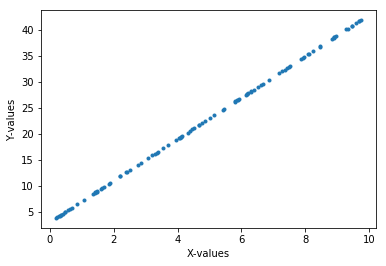

In [9]:
pl.plot(x_vals, y_vals, ".")
pl.xlabel("X-values")
pl.ylabel("Y-values");

In [0]:
pl.plot?

adding some scatter

In [0]:
scattered_y = np.random.randn(100) * 5

In [0]:
y_vals += scattered_y

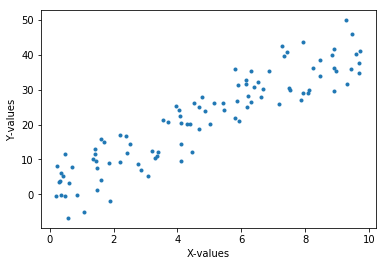

In [13]:
pl.plot(x_vals, y_vals, ".")
pl.xlabel("X-values")
pl.ylabel("Y-values");

adding uncertainties as well

In [0]:
uncertanties = np.random.randn(100) * 7

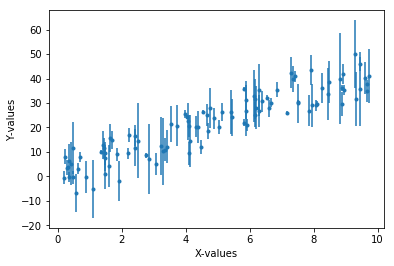

In [15]:
pl.errorbar(x_vals, y_vals, yerr = uncertanties, fmt = ".")
pl.xlabel("X-values")
pl.ylabel("Y-values");

# fit a line to data with scipy

In [0]:
popt, pcov = sp.optimize.curve_fit(line, x_vals, y_vals, p0=[5, 0])

In [42]:
popt

array([4.13271628, 1.7481264 ])

In [17]:
pcov

array([[ 0.03279955, -0.15642658],
       [-0.15642658,  1.02770122]])

In [0]:
# this is the buggy code

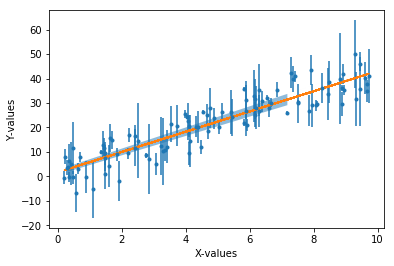

In [19]:
pl.errorbar(x_vals, y_vals, yerr = uncertanties, fmt = ".")
pl.plot(x_vals, line(x_vals, popt[0], popt[1]), 
        "-")
#adding uncertainty band: the covariance contains:

#|pcov[0][0] . pcov[0][1] | =  |sigma_slope^2                  slope-intercept covariance |
#|pcov[1][0] . pcov[1][1] |    |slope-intercept covariance              sigma_intercept^2 |


pl.fill_between(x_vals, 
                line(x_vals, popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                line(x_vals, popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5), alpha=0.5)

pl.xlabel("X-values")
pl.ylabel("Y-values");



the bug was because the data  was not sorted along the x axis. The shaded region got plotted up to the last value given. To sort the data I create an array that gives me the sorted indices with np.argsort, and then I index the x array by that 

In [0]:
sorter = np.argsort(x_vals)


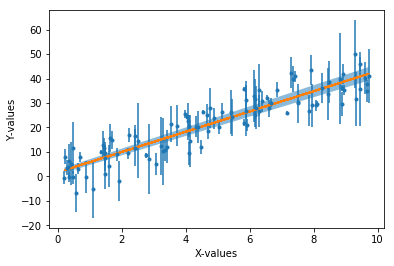

In [21]:
pl.errorbar(x_vals, y_vals, yerr = uncertanties, fmt = ".")
pl.plot(x_vals, line(x_vals, popt[0], popt[1]), 
        "-")

pl.fill_between(x_vals[sorter], 
                line(x_vals[sorter], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                line(x_vals[sorter], popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5), alpha=0.5)

pl.xlabel("X-values")
pl.ylabel("Y-values");



# fit a line to data with sklearn 
(the standard library for machine learning)

In [0]:
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


sklearn is object oriented: I have to create a regressor object

In [0]:
regr = skl.linear_model.LinearRegression()


then I can fit the object to the data

In [24]:
regr.fit(np.atleast_2d(x_vals).T, y_vals)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

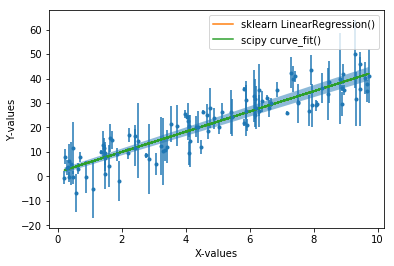

In [25]:
pl.errorbar(x_vals, y_vals, yerr = uncertanties, fmt = ".")
pl.xlabel("X-values")
pl.ylabel("Y-values");
pl.plot(x_vals, regr.predict(np.atleast_2d(x_vals).T), '-', label="sklearn LinearRegression()")
pl.plot(x_vals, line(x_vals, popt[0], popt[1]), 
        "-", label="scipy curve_fit()")

pl.fill_between(x_vals[sorter], 
                line(x_vals[sorter], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                line(x_vals[sorter], popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5), alpha=0.5)
pl.legend()
pl.xlabel("X-values")
pl.ylabel("Y-values");



are you surprised that they are different? remember we did not use the uncertainties with sklearn! can you include the uncertainties? investigate by looking at the signature of LinearRegression()

In [26]:
#this is the R^2 score https://en.wikipedia.org/wiki/Coefficient_of_determination
np.round(regr.score(np.atleast_2d(x_vals).T, y_vals), 2)


0.84

# cross validation
Let's do a "cross validation" on this model: set 75% of the data as training and the rest as test. (the way . am about to split the data into training/test is not ideal. Can you tell me why? the first to a nswer on slack gets +0.5 points on their next homework!)

In [27]:
regr.fit(np.atleast_2d(x_vals[:75]).T, y_vals[:75])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
np.round(regr.score(np.atleast_2d(x_vals[:75]).T, y_vals[:75]), 2)


0.84

In [29]:
np.round(regr.score(np.atleast_2d(x_vals[75:]).T, y_vals[75:]), 2)


0.81

the lower score in the test set is expected: the model is not trained on these data. But if the 2 scvores diverge significantly that is a symptom of overfitting

19977.49169679162


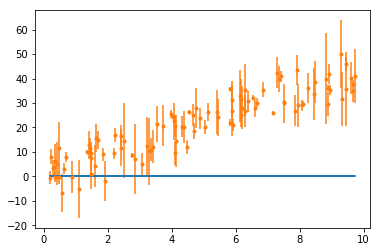

17156.58012756581


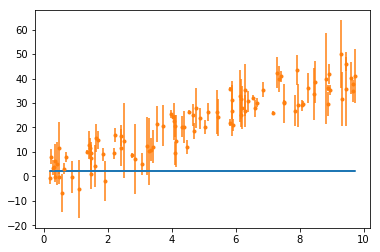

14628.755078886354


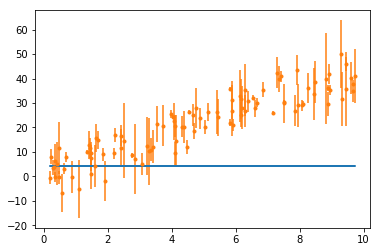

12394.01655075324


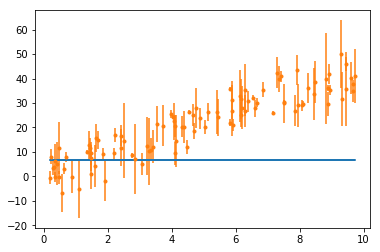

10452.364543166483


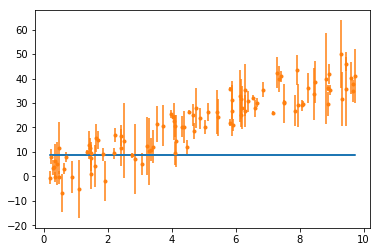

8803.799056126078


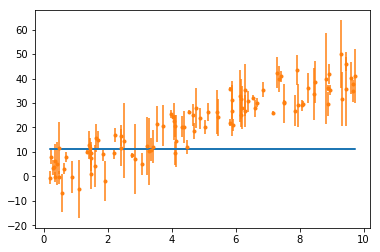

7448.32008963202


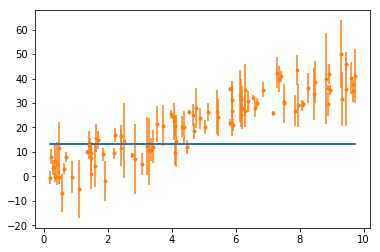

6385.92764368432


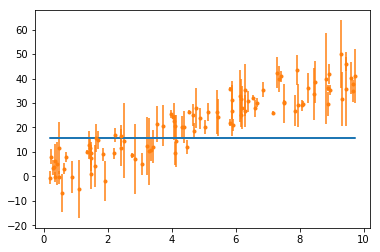

5616.621718282972


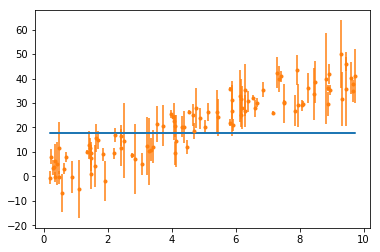

5140.402313427975


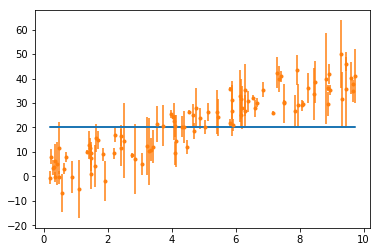

11456.833558171162


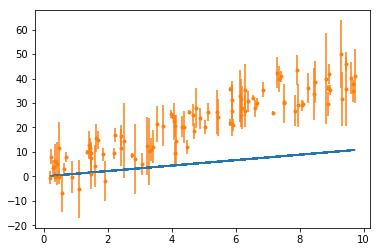

9345.218136870775


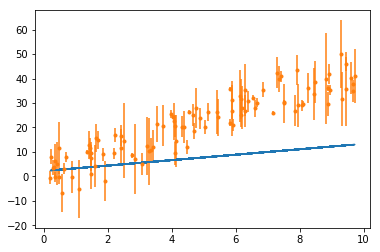

7526.689236116737


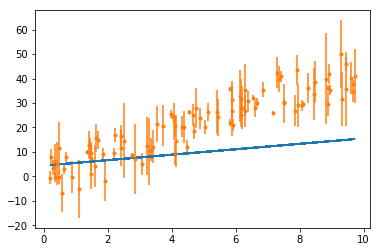

6001.246855909054


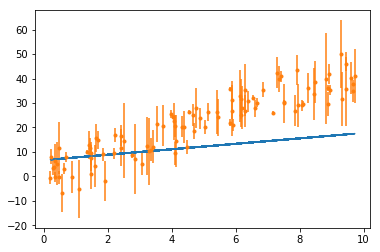

4768.890996247724


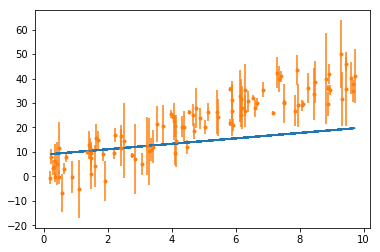

3829.6216571327445


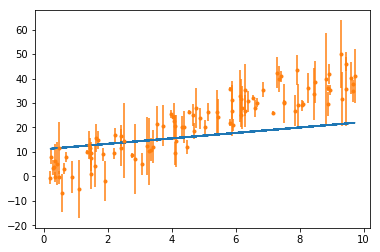

3183.438838564116


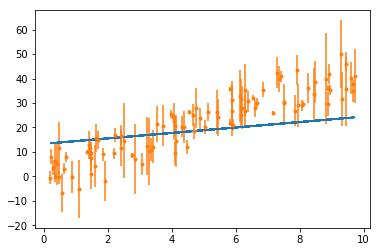

2830.3425405418407


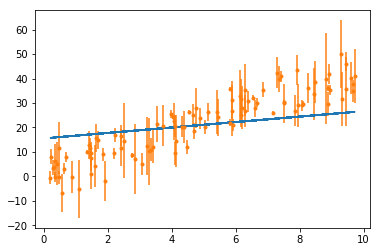

2770.332763065918


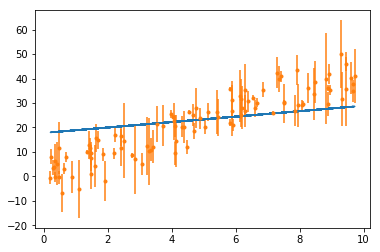

3003.409506136346


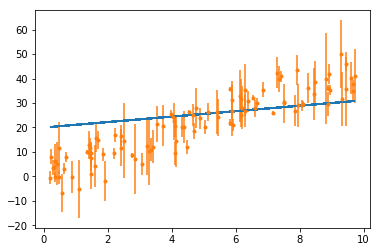

5427.340431480156


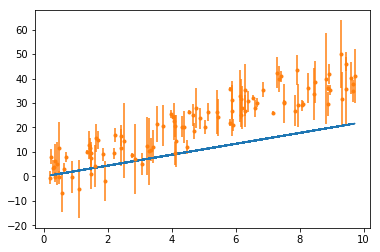

4025.021158105196


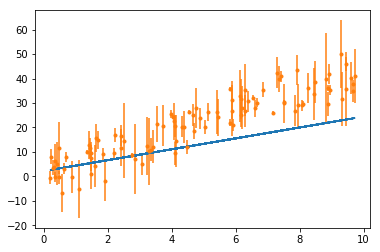

2915.7884052765867


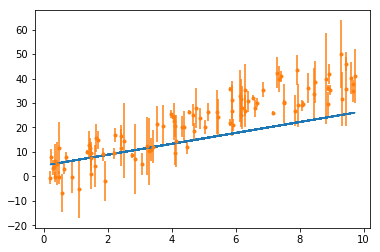

2099.64217299433


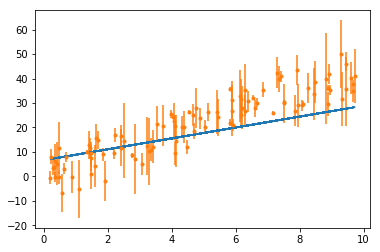

1576.5824612584238


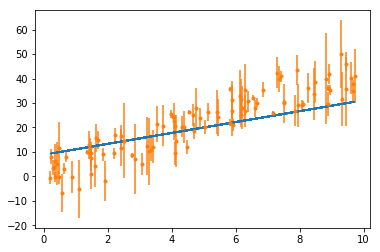

1346.609270068871


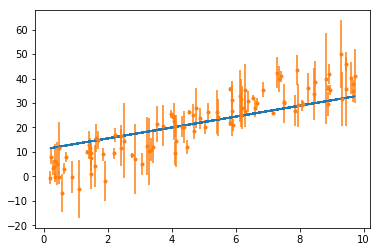

1409.72259942567


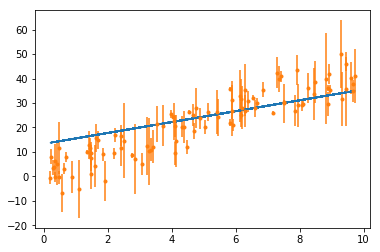

1765.9224493288207


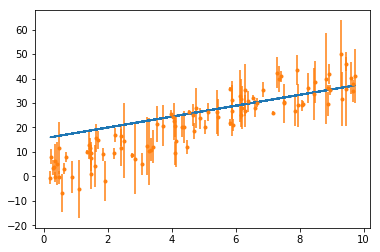

2415.208819778323


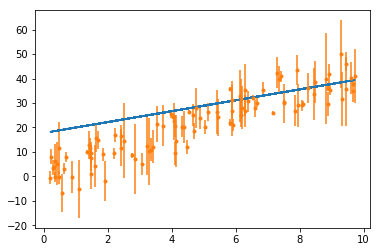

3357.5817107741777


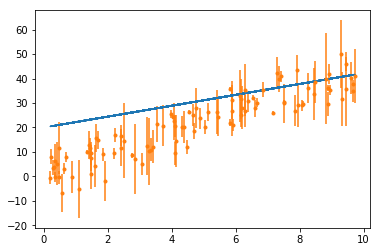

1889.0123167186148


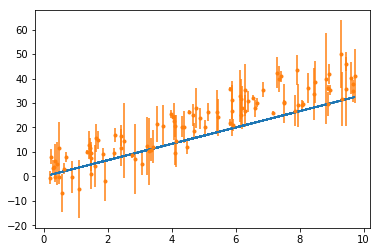

1195.9891912690796


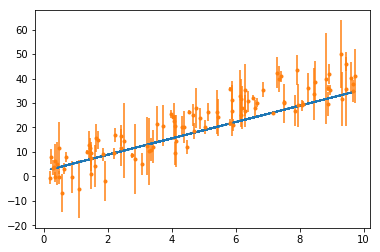

796.0525863658963


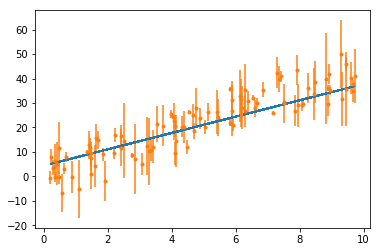

689.2025020090653


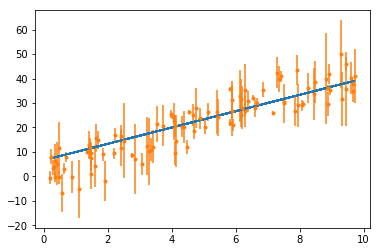

875.4389381985864


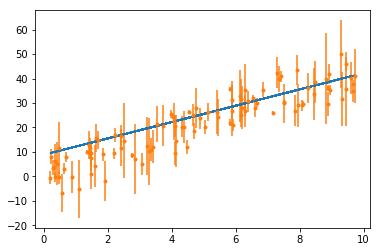

1354.761894934459


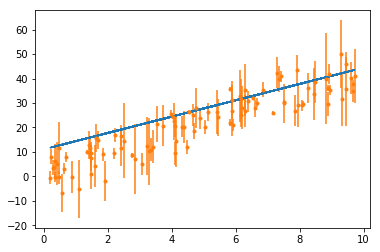

2127.171372216684


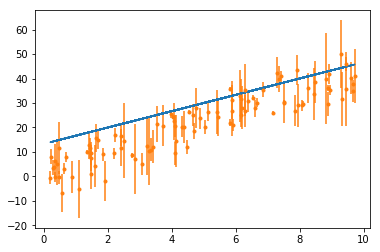

3192.66737004526


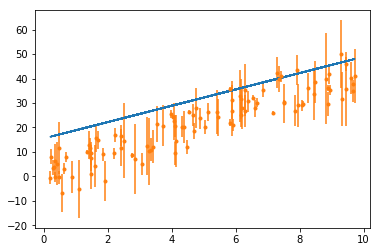

4551.24988842019


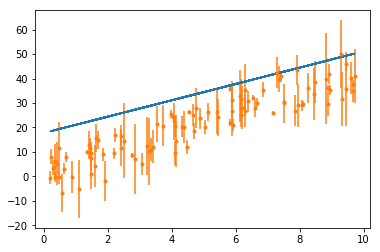

6202.9189273414695


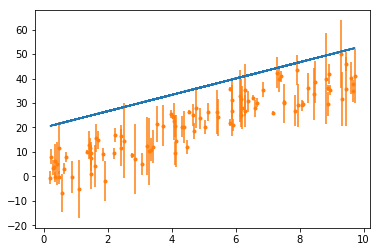

841.8492138865331


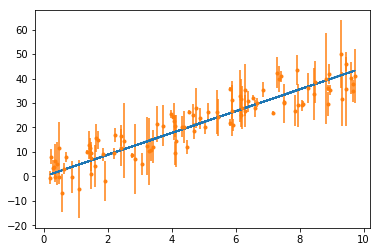

858.122236362424


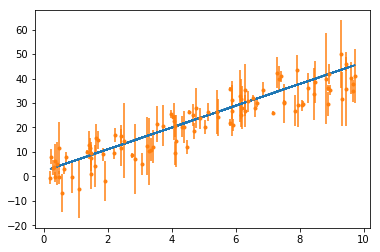

1167.4817793846667


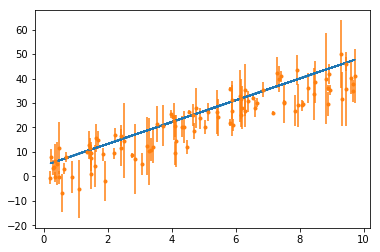

1769.9278429532612


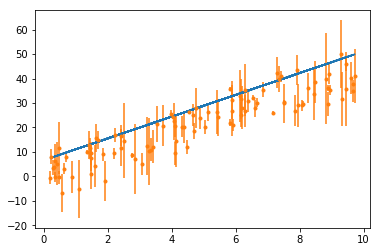

2665.4604270682094


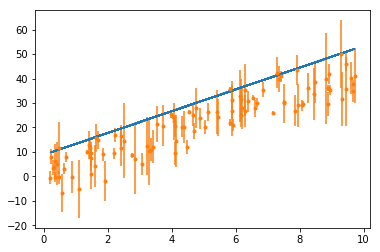

3854.079531729507


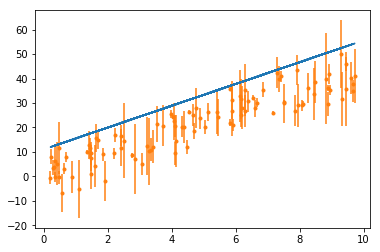

5335.785156937159


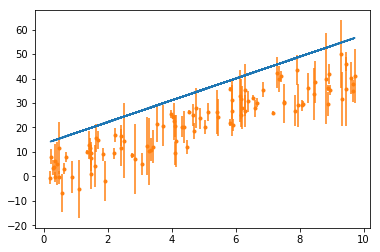

7110.577302691162


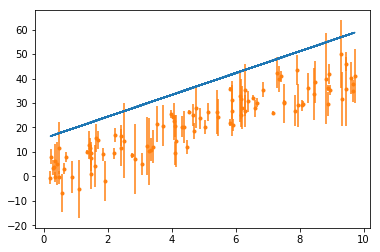

9178.455968991519


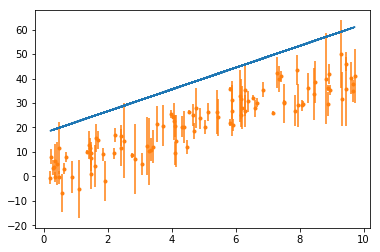

11539.421155838223


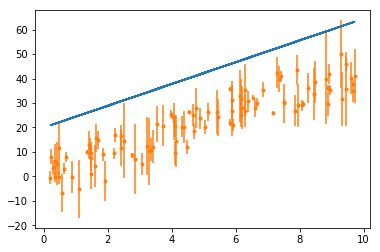

2285.8511229839105


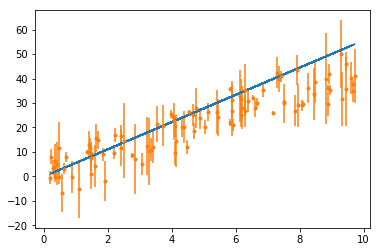

3011.4202933852275


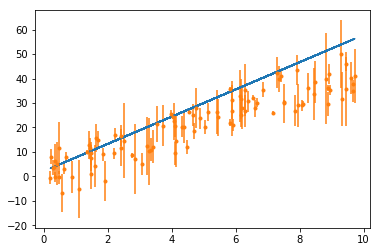

4030.075984332896


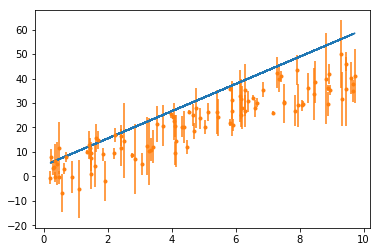

5341.818195826915


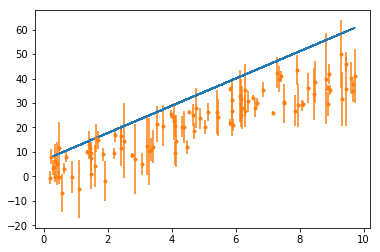

6946.6469278672885


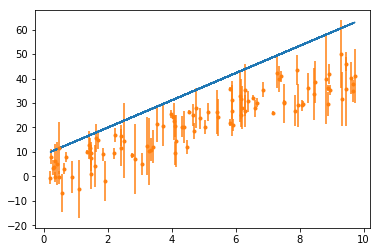

8844.562180454019


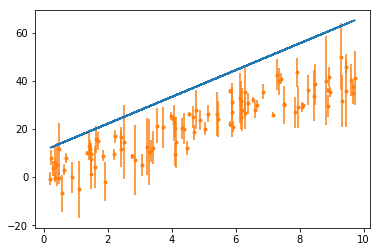

11035.563953587092


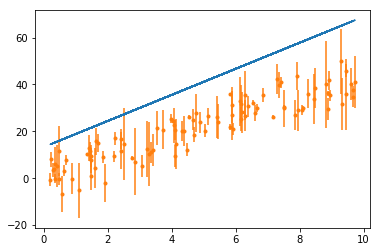

13519.65224726652


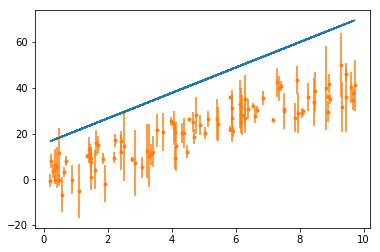

16296.8270614923


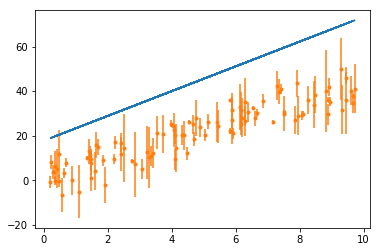

19367.088396264433


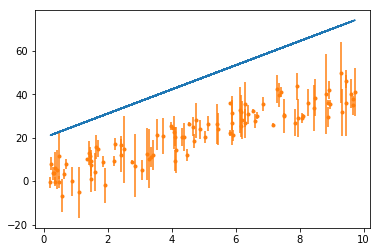

6221.0180440107515


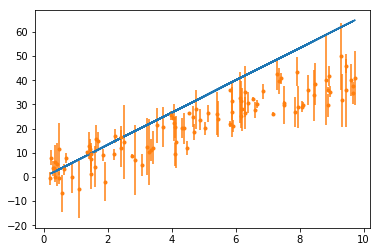

7655.883362337495


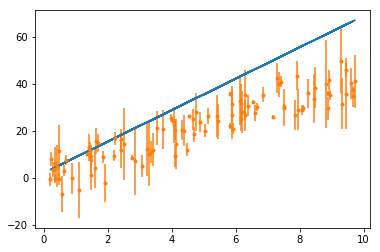

9383.835201210586


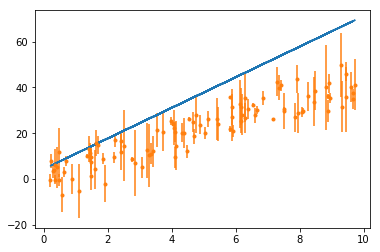

11404.873560630036


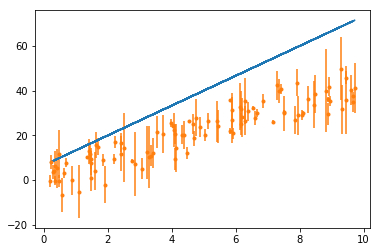

13718.998440595835


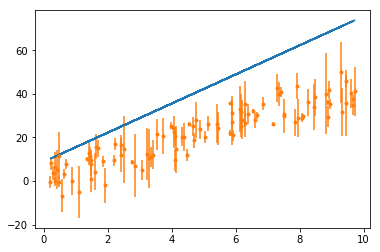

16326.209841107984


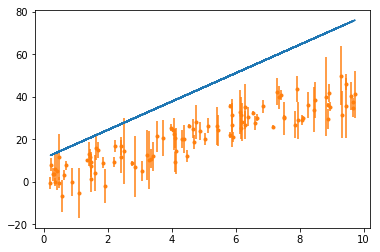

19226.50776216649


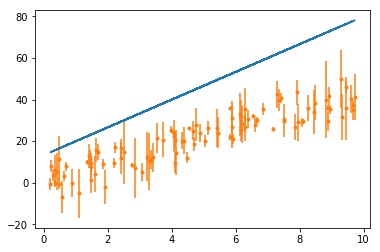

22419.89220377135


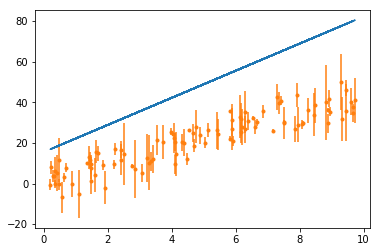

25906.363165922554


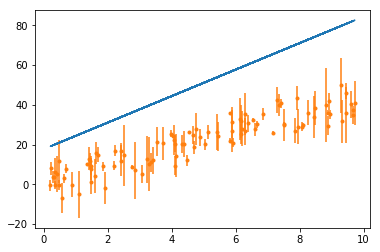

29685.920648620107


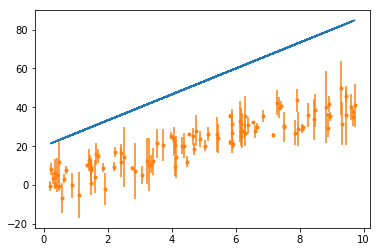

12647.34997696705


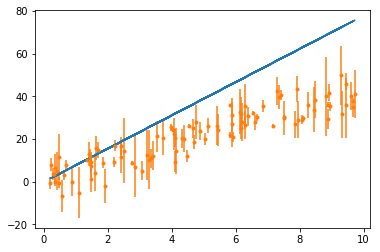

14791.511443219226


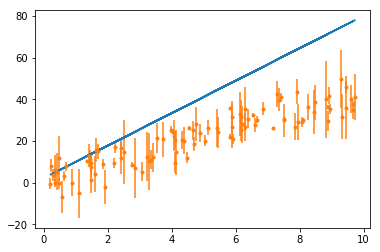

17228.759430017744


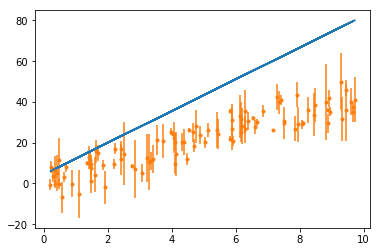

19959.09393736262


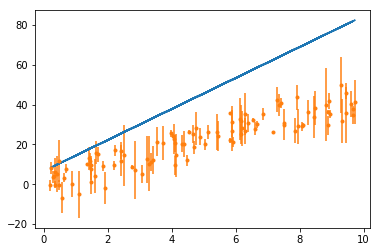

22982.51496525384


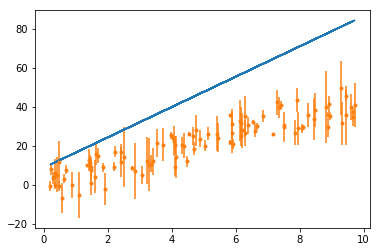

26299.022513691412


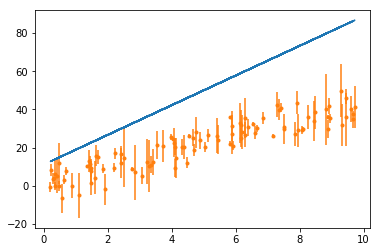

29908.616582675346


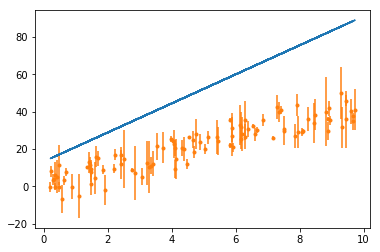

33811.29717220563


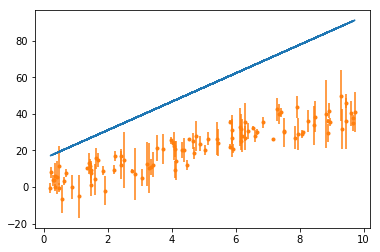

38007.064282282256


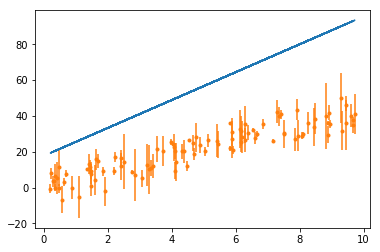

42495.91791290525


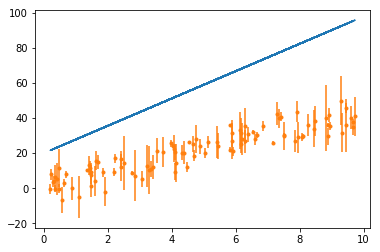

21564.846921852804


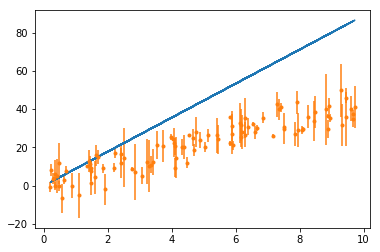

24418.30453603041


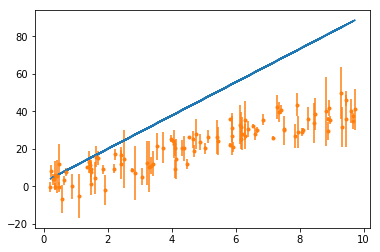

27564.848670754352


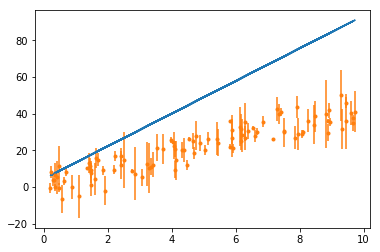

31004.47932602465


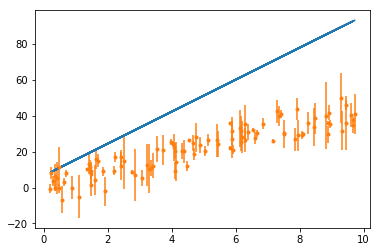

34737.196501841296


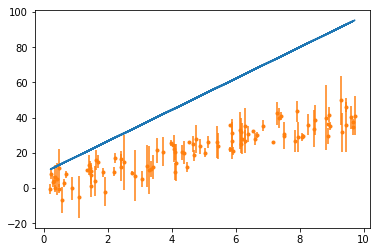

38763.0001982043


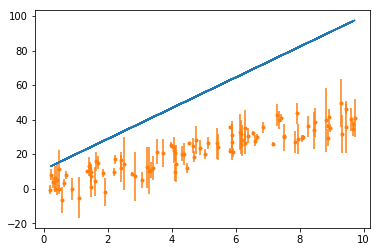

43081.89041511365


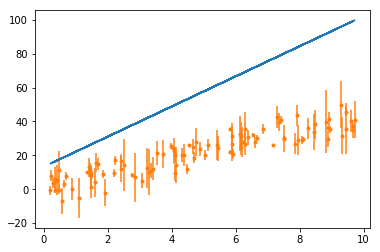

47693.867152569364


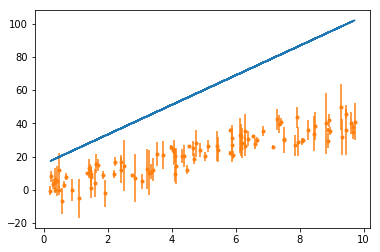

52598.93041057142


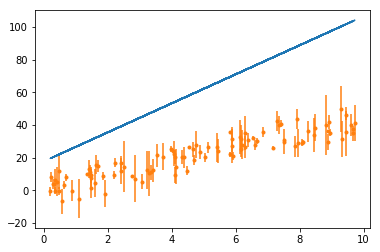

57797.08018911984


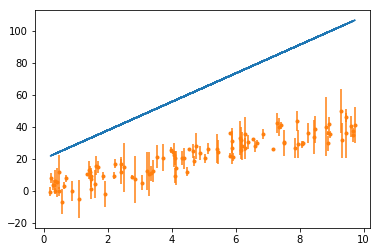

32973.508878668035


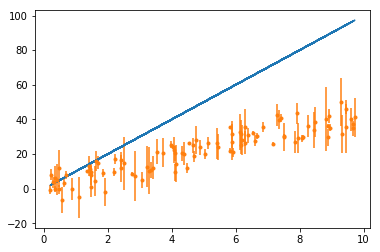

36536.262640771056


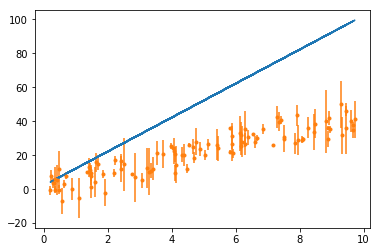

40392.102923420425


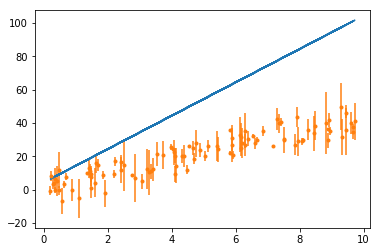

44541.02972661615


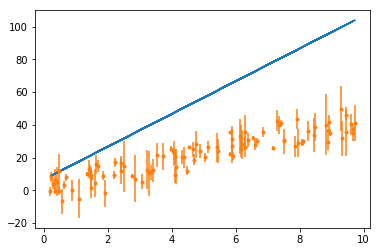

48983.043050358225


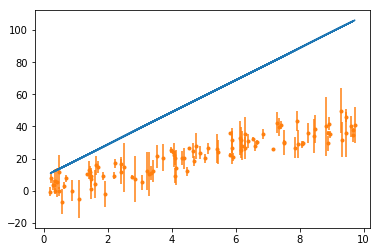

53718.14289464666


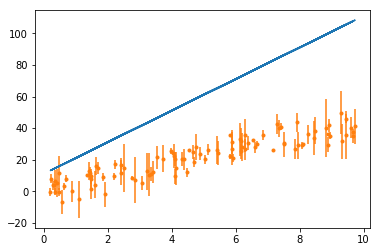

58746.32925948144


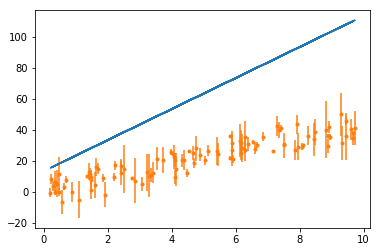

64067.602144862576


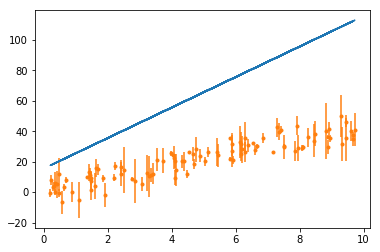

69681.96155079005


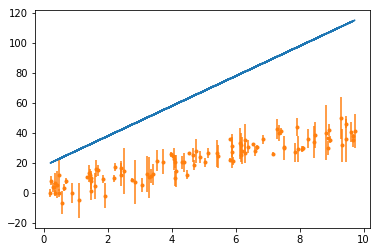

75589.4074772639


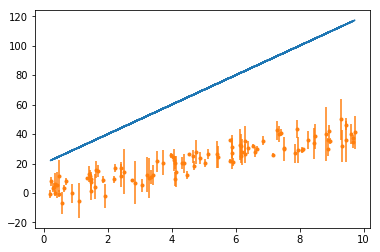

In [51]:
chisqs = np.zeros((10,10))

for i,x in enumerate(np.linspace(0, 10, 10)):
  for j,y in enumerate(np.linspace(0, 20,10)):
    chisqs[i,j] = np.sum((line(x_vals, x, y) - y_vals)**2 / uncertanties**2)
    pl.plot(x_vals, line(x_vals, x, y))
    pl.errorbar(x_vals, y_vals, yerr=uncertanties, fmt='.')    
    print(chisqs[i,j])
    pl.show()
    

In [0]:
chisqs = np.zeros((100,100))

for i,x in enumerate(np.linspace(0, 10, 100)):
  for j,y in enumerate(np.linspace(0, 20, 100)):
    chisqs[i,j] = np.sum((line(x_vals, x, y) - y_vals)**2 / uncertanties**2)
    #pl.plot(x_vals, line(x_vals, x, y))
    #pl.errorbar(x_vals, y_vals, yerr=uncertanties, fmt='.')    
    #print(chisqs[i,j])
    #pl.show()
 

Text(0, 0.5, 'intercept')

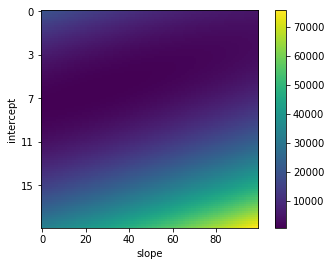

In [69]:
pl.imshow(chisqs)
pl.colorbar()
pl.xticks(range(0,100, 20), ["%d"%i for i in np.linspace(0, 80, 5)])
pl.xlabel("slope")
pl.yticks(range(0, 100, 20), ["%d"%i for i in np.linspace(0, 15, 5)])
pl.ylabel("intercept")


In [70]:
chisqs[chisqs == chisqs.min()][0]

642.8837791412143

In [71]:
np.where(chisqs == chisqs.min())

(array([37]), array([22]))

In [74]:
np.linspace(0, 10, 100)[37], np.linspace(0, 20, 100)[22]

(3.7373737373737375, 4.444444444444445)

In [75]:
popt

array([4.13271628, 1.7481264 ])

In [0]:
import statsmodels.api as sm
from statsmodels.api import formula

In [0]:
df = pd.DataFrame({'x':x_vals, 'y':y_vals})

In [0]:
model = formula.ols('y~x', data=df)

In [0]:
mod = model.fit()


In [100]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     520.7
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           5.35e-41
Time:                        18:54:14   Log-Likelihood:                -307.79
No. Observations:                 100   AIC:                             619.6
Df Residuals:                      98   BIC:                             624.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7481      1.014      1.724      0.088      -0.264       3.760
x              4.1327      0.181     22.819      0.000       3.773       4.492
==============================================================================
Omnibus:                        4.184   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                2.364
Skew:                          -0.118   Prob(JB):                        0.307
Kurtosis:                       2.285   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
df["x2"] = df['x']**2
model = formula.ols('y~x2 + x', data=df)

In [0]:
mod2 = model.fit()


In [103]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     265.3
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           4.70e-40
Time:                        18:54:16   Log-Likelihood:                -306.57
No. Observations:                 100   AIC:                             619.1
Df Residuals:                      97   BIC:                             627.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1606      1.436      0.112      0.911      -2.690       3.012
x2            -0.1075      0.069     -1.549      0.125      -0.245       0.030
x              5.1716      0.694      7.449      0.000       3.794       6.550
==============================================================================
Omnibus:                        3.260   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.015
Skew:                          -0.099   Prob(JB):                        0.365
Kurtosis:                       2.334   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
mod2.compare_lr_test(mod)

(2.444108734229985, 0.11796687202751664, 1.0)